# LSTM Time Series Example -  Stock price prediction

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

## Import data

In [2]:
tr_data = pd.read_csv('Stock_data.csv')  

In [3]:
tr_data_proc = tr_data.iloc[:, 1:2].values  

In [4]:
data_dates = tr_data.iloc[:, 0].values  

## Preprocess data

In [5]:
N=60

In [6]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range = (0, 1))

tr_data_scaled = scaler.fit_transform(tr_data_proc)  
tr_data_scaled.shape

(1280, 1)

In [7]:
print(tr_data_proc)

[[ 79.117142]
 [ 78.26857 ]
 [ 76.709999]
 ...
 [170.160004]
 [165.529999]
 [166.869995]]


In [8]:
features_set = []  
labels = []  
for i in range(N, 1280):  
    features_set.append(tr_data_scaled[i-N:i, 0])
    labels.append(tr_data_scaled[i, 0])

In [9]:
features_set, labels = np.array(features_set), np.array(labels)  

In [10]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1)) 

## LSTM Training

In [11]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout  

Using TensorFlow backend.


In [12]:
model = Sequential()  
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1))) 
model.add(Dropout(0.2))  
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))
model.add(LSTM(units=50))  
model.add(Dropout(0.2))  
model.add(Dense(units = 1))  
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  
model.fit(features_set, labels, epochs = 100, batch_size = 32)  

Epoch 1/100
1220/1220 [==============================] - 28s 23ms/step - loss: 0.0333
Epoch 2/100
1220/1220 [==============================] - 18s 15ms/step - loss: 0.0048
Epoch 3/100
1220/1220 [==============================] - 16s 13ms/step - loss: 0.0046
Epoch 4/100
1220/1220 [==============================] - 16s 13ms/step - loss: 0.0043
Epoch 5/100
1220/1220 [==============================] - 17s 14ms/step - loss: 0.0043
Epoch 6/100
1220/1220 [==============================] - 19s 16ms/step - loss: 0.0036
Epoch 7/100
1220/1220 [==============================] - 19s 15ms/step - loss: 0.0033
Epoch 8/100
1220/1220 [==============================] - 18s 14ms/step - loss: 0.0035
Epoch 9/100
1220/1220 [==============================] - 17s 14ms/step - loss: 0.0034
Epoch 10/100
1220/1220 [==============================] - 16s 14ms/step - loss: 0.0034
Epoch 11/100
1220/1220 [==============================] - 17s 14ms/step - loss: 0.0032
Epoch 12/100
1220/1220 [============================

## LSTM Testing

In [13]:
test_data = pd.read_csv('Stock_testdata.csv')  
test_data_proc = test_data.iloc[:, 1:2].values 
test_data_dates = test_data.iloc[:, 0].values 

### Preprocess test data

In [14]:
data_all = pd.concat((tr_data['Open'], test_data['Open']), axis=0)  

In [15]:
test_inputs = data_all[len(data_all) - len(test_data) - 60:].values  

In [16]:
test_inputs = test_inputs.reshape(-1,1)  
test_inputs = scaler.transform(test_inputs)  

In [17]:
test_features = []  
for i in range(60, 80):  
    test_features.append(test_inputs[i-60:i, 0])

In [18]:
test_features = np.array(test_features)  
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))  

In [19]:
predictions = model.predict(test_features)  

In [20]:
predictions = scaler.inverse_transform(predictions)  

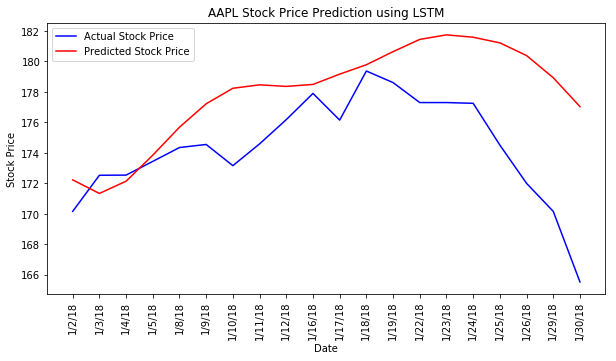

In [21]:
plt.figure(figsize=(10,5))  
plt.plot(test_data_dates[0:20],test_data_proc[0:20], color='blue', label='Actual Stock Price')  
plt.plot(predictions , color='red', label='Predicted Stock Price')
plt.xticks(rotation=90, size=10)
plt.title('AAPL Stock Price Prediction using LSTM')  
plt.xlabel('Date')  
plt.ylabel('Stock Price')  
plt.legend()  
plt.show()  